<a href="https://colab.research.google.com/github/nanpolend/machine-learning/blob/master/%E5%AE%8C%E5%85%A8%E9%80%A3%E6%8E%A5%E5%B1%A4%E7%A5%9E%E7%B6%93%E7%B6%B2%E8%B7%AF%E8%A8%93%E7%B7%B4%E5%9C%96_Gemini%E4%BF%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
+-------+
  輸入 X -->| Dense |--> 輸出 y
           +-------+
              ^
              |
              | 權重和偏差
              |
              v
           +-------+
           | Adam  |
           +-------+
              ^
              |
              | 損失函數
              | (均方誤差)
              v
           +-------+
           | 訓練 |
           +-------+

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36913 (\N{CJK UNIFIED IDEOGRAPH-9031}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/cor

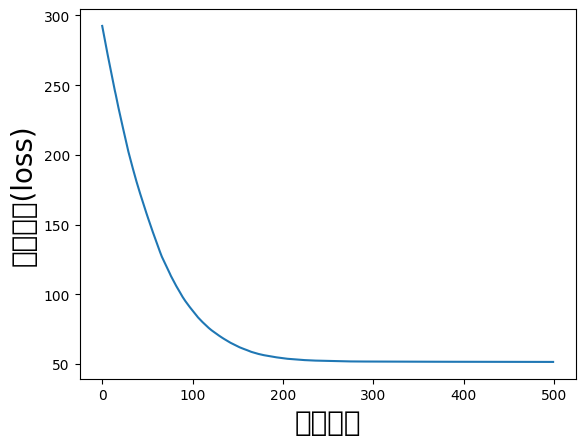

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 設定資料點數量
n = 100

# 產生輸入資料 X 和目標資料 y
X = np.linspace(0, 50, n)  # 產生 0 到 50 之間 n 個等間隔的數字
y = np.linspace(0, 50, n)  # 產生 0 到 50 之間 n 個等間隔的數字

# 加入雜訊，使資料更接近真實情況
X += np.random.uniform(-10, 10, n)  # 加入 -10 到 10 之間的隨機雜訊
y += np.random.uniform(-10, 10, n)  # 加入 -10 到 10 之間的隨機雜訊

# 建立模型
# Dense 層：一個具有單一神經元的全連接層，輸入形狀為 [1] (單一數值)
layer1 = tf.keras.layers.Dense(units=1, input_shape=[1])
# Sequential 模型：將層線性堆疊起來的模型，此模型只包含 layer1
model = tf.keras.Sequential([layer1])

# 編譯模型
# loss：使用均方誤差 (mean_squared_error) 作為損失函數
# optimizer：使用 Adam 優化器來更新模型權重
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

# 訓練模型
# epochs：訓練週期數，設定為 500
# verbose：設定為 False，不顯示訓練過程的詳細資訊
history = model.fit(X, y, epochs=500, verbose=False)

# 繪製損失函數圖
plt.xlabel('訓練週期', fontsize=20)  # 設定 x 軸標籤為 "訓練週期"
plt.ylabel("損失函數(loss)", fontsize=20)  # 設定 y 軸標籤為 "損失函數(loss)"
plt.plot(history.history['loss'])  # 繪製損失函數變化圖
plt.show()  # 顯示圖表